# Conceptos de Web Scraping

__Web scraping__: La práctica de recopilar datos específicos mediante un programa automatizado que consulta un servidor web

__Web crawling__: La práctica de navegar en una página y descubrir nuevas através de hipervínculos que vaya encontrando. Realiza un mapeo de la estructura del sitio

__API:__ Provee acceso a los datos de una aplicación

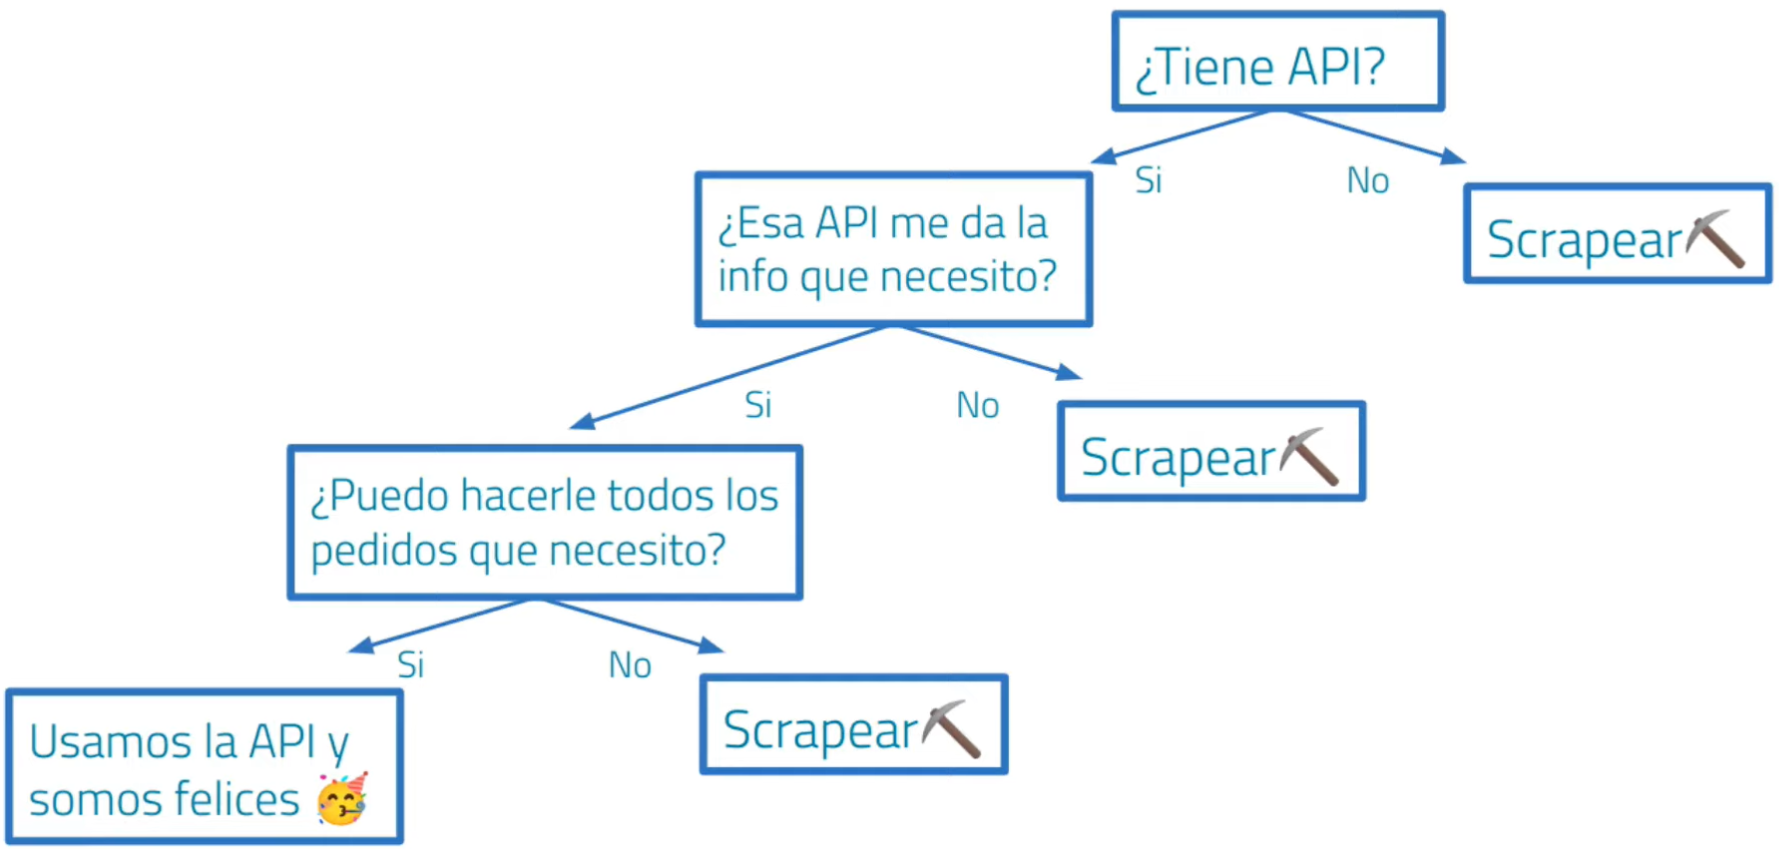

__HTTPS:__ Es un protocolo de comunicación seguro entre un ordenador y un servidor. Como no siempre hay una buena comunicación existen los _códigos de estado_ que informan sobre qué pasó

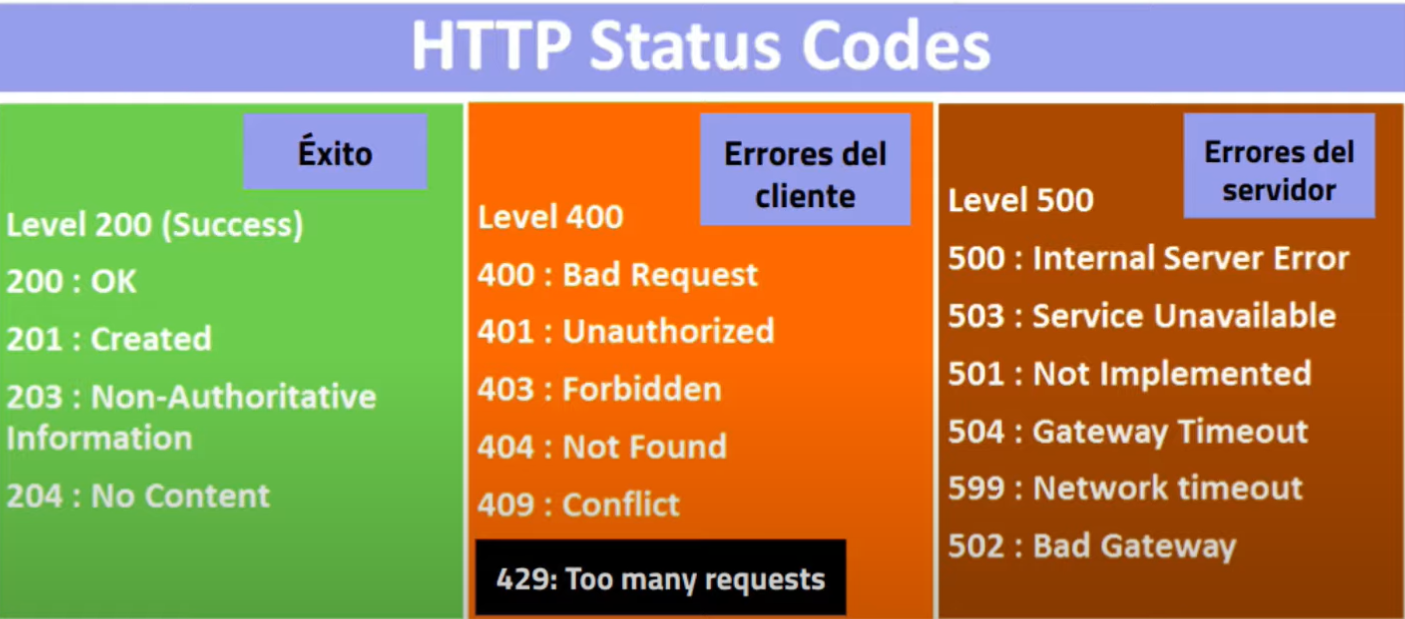

Existen tipos de archivos para compartir información: csv, json, xml

HTML (estructura), CSS (estilo) y JS (interactividad y funcionalidad) son los 3 principales lenguajes para construir sitios web.

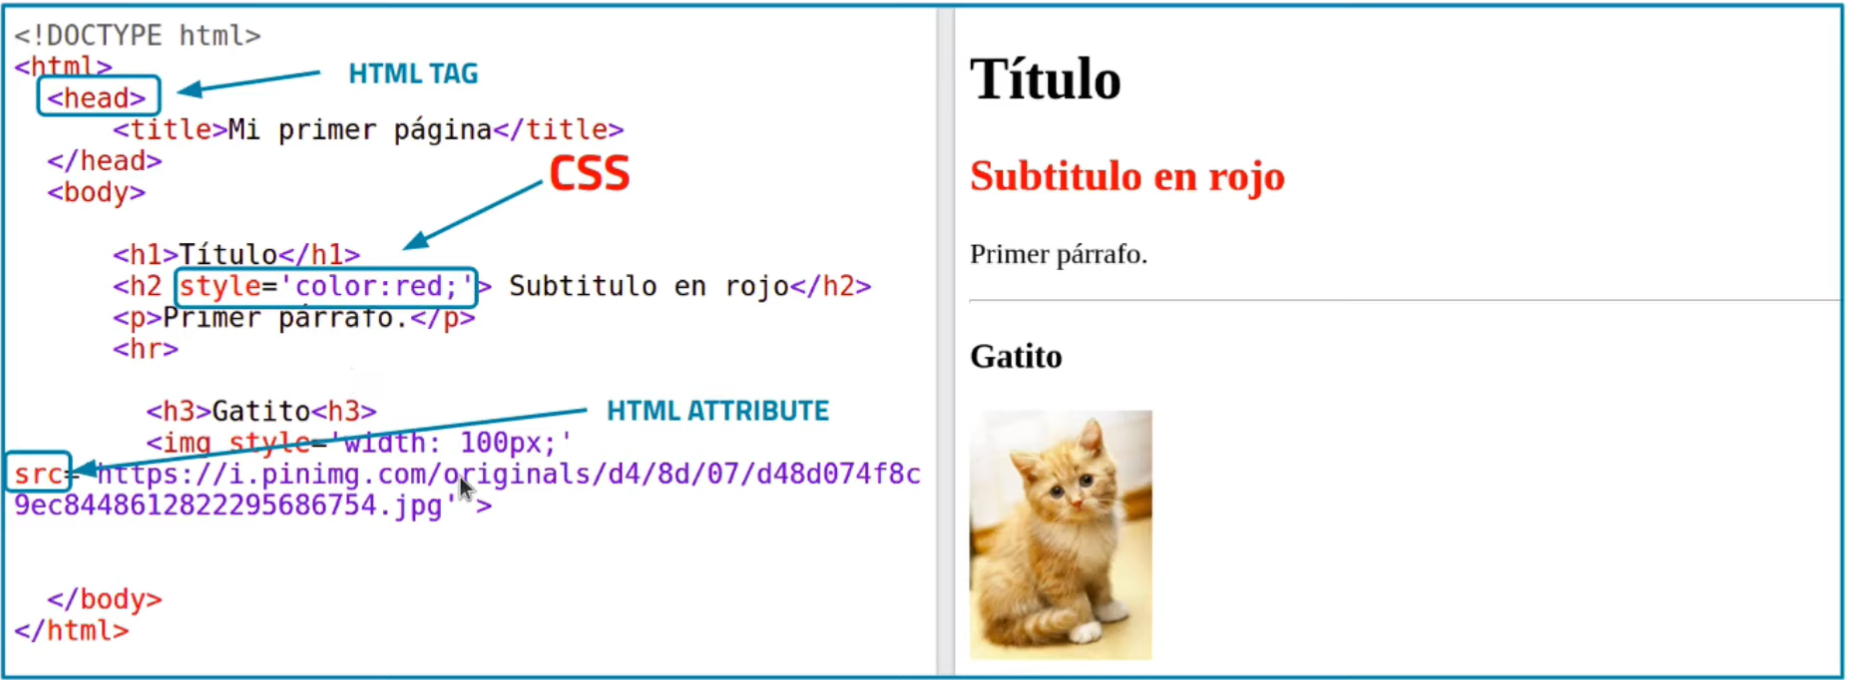

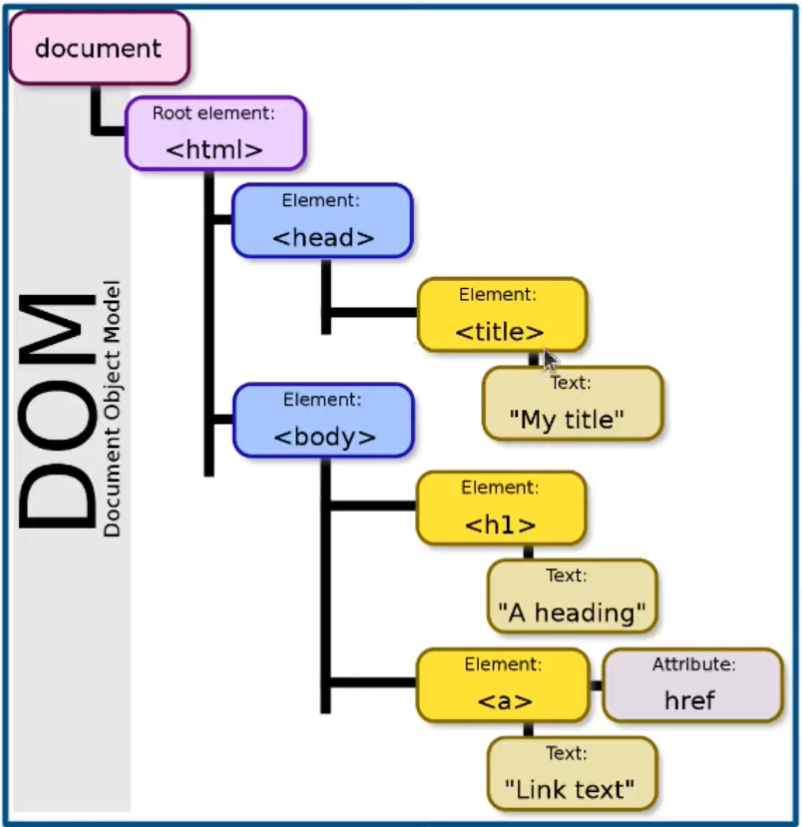

También tener en consideración que existirá código en JS que al darle click a algo (evento) ejecuta una función específica, que se refleja en un cambio interactivo en la máquina

"Parsear" un documento HTML, es dividir el texto en sus componentes para extraer información de ellos.

__Flujo de trabajo de web scraping__

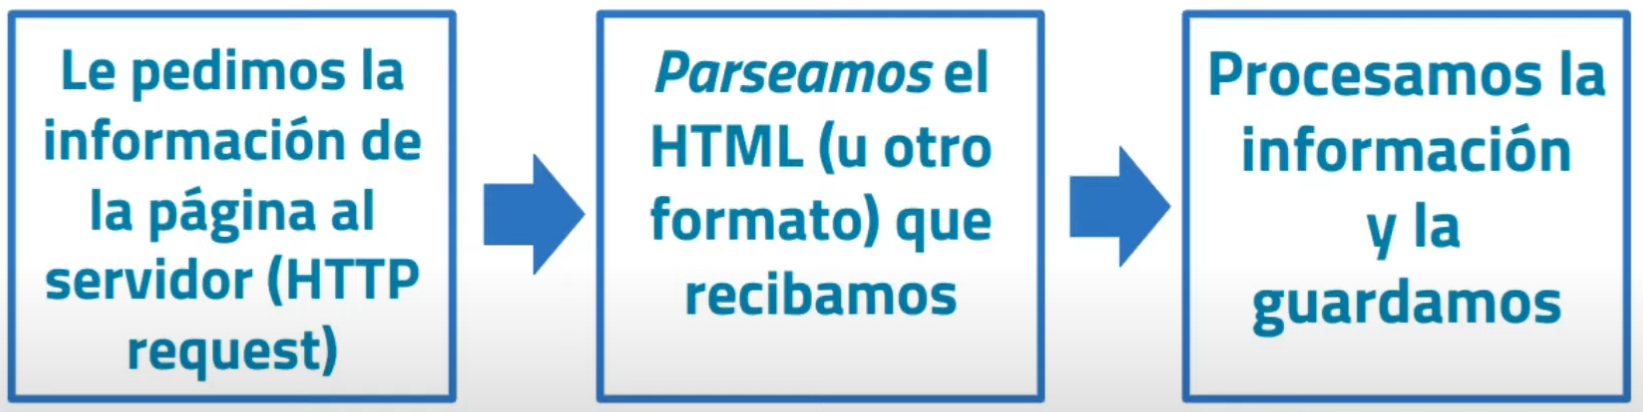

Beautifulsoup es la librería de Python más extendida para hacer web scraping.

Se usa para extraer datos de archivos HTML y XML, creando un árbol de análisis a partir del código fuente de la página

## Trabajando con APIs

API con la que trabajaremos: https://sunrise-sunset.org/api#documetation

In [ ]:
# %pip3 install wikipedia-api 
%pip3 install beautifulsoup4

In [ ]:
# Librerías necesarias
import json
import requests # type: ignore
import wikipediaapi # type: ignore

In [ ]:
dir_api= "https://api.sunrise-sunset.org/json?" # inventa datos, no es real :'v

# Obligatorios (ubicación Huaraz)
latitud = -9.52779
longitud = -77.52778

# Opcionales
fecha = "2025-11-01" # AAAA-MM-DD (hoy por defecto)
timezone = "America/Lima"

El objeto Response de requests tiene:
- .text
- .content
- .json()
- status_code

In [ ]:
respuesta = requests.get(f"{dir_api}lat={latitud}&lng={longitud}&date={fecha}&tzid={timezone}")
print(type(respuesta))
print(respuesta.status_code)

In [ ]:
# Usando el formato JSON de la respuesta
datos = respuesta.json()
print(type(datos))
print(datos["status"])
datos

In [ ]:
huaraz_sunrise = datos["results"]["sunrise"]
huaraz_sunset = datos["results"]["sunset"]

API con la que trabajaremos: http://httpbin.org/headers

In [ ]:
URL = 'http://httpbin.org/headers'
head = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
}

In [ ]:
respuesta = requests.get(URL, headers=head)
print(respuesta.text)

In [ ]:
# Obtenemos el "User-Agent" a usar
respuesta_2 = requests.get(URL)
print(respuesta_2.text)

Usando la API de Wikipedia

In [ ]:
IDIOMA = "es"
PALABRA_CLAVE = "Chester_Bennington"
USER_AGENT = "python-requests/2.32.3"

In [ ]:
wiki_wiki = wikipediaapi.Wikipedia(
    user_agent=USER_AGENT,
    language=IDIOMA)
wikipedia = wiki_wiki.page(PALABRA_CLAVE)
type(wikipedia)

In [ ]:
wikipedia.summary

------

# Descarga automática de videos

In [52]:
# INSTALACIÓN DE LIBRERÍAS

%pip install pyautogui==0.9.35
%pip install selenium
%pip install bs4
%pip install requests
%pip install -U pywinauto
%pip install openpyxl
%pip install pandas

You should consider upgrading via the 'c:\Users\harol\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\harol\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\harol\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\harol\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\harol\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\harol\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


     --------------------------------------- 11.6/11.6 MB 28.5 MB/s eta 0:00:00
     --------------------------------------- 15.9/15.9 MB 18.8 MB/s eta 0:00:00
  Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\harol\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


### Necesarios

In [7]:
# LIBRERÍAS NECESARIAS

from selenium import webdriver #type:ignore
from selenium.webdriver.support import expected_conditions as EC #type:ignore
from selenium.webdriver.support.ui import WebDriverWait #type:ignore
from selenium.webdriver.chrome.options import Options #type:ignore
from selenium.webdriver.common.by import By #type:ignore
from bs4 import BeautifulSoup #type:ignore
from typing import List, Dict
import pandas as pd #type:ignore
import pyautogui # type:ignore
import time
import os
import re
import shutil
import requests #type:ignore
import random

In [41]:
# VARIABLES CONSTANTES (FIJAS)

URL_BASE = "https://platzi.com"
DESCARGAS_PATH = r"C:\Users\harol\Downloads"
CURRENT_DIRECTORY_PATH = r"D:\2_Courses\FreeCodeCamp\Web_Scraping"
CHROME_PROFILE_PATH = r"C:\Users\harol\AppData\Local\Google\Chrome\User Data"

# XPATH_BOTON_DESCARGA_VIDEO_EXTENSION = '//*[@id="panel"]/div[1]/div[5]/button[5]' # fetchv
# XPATH_BOTON_CAMBIAR_NOMBRE_VIDEO_EXTENSION = "/html/body/div[1]/div[1]/div[2]/div/div[1]/div[2]/button[1]"
# XPATH_BOTON_CONFIRMAR_NOMBRE_VIDEO_EXTENSION = "/html/body/div[1]/div[1]/div[2]/div/div[1]/div[2]/button[2]"
# XPATH_CUADRO_NOMBRE_VIDEO_EXTENSION = "/html/body/div[1]/div[1]/div[2]/div/div[1]/div[2]/input"
# XPATH_BOTON_DESCARGAR_VIDEO_EXTENSION = "/html/body/div[3]/div[3]/div[1]/div[1]/div[1]/button"
# XPATH_BOTON_DESCARGAR_VIDEO_EXTENSION = "/html/body/div[1]/div/div[1]/div[3]/section/div[4]/div/div[1]/div/div[2]/div[4]/div/div/button[1]" # streamrecorder
XPATH_BOTON_DESCARGAR_VIDEO_EXTENSION = '//*[@id="videos"]/div/div[1]/div/div[2]/div[4]/div/div/button[1]' # streamrecorder

## Creación de estructura de carpetas y extracción de recursos

### Funciones del código

In [9]:
def abrir_chrome_con_perfil(profile_directory, nueva_ruta=None):
    """
    Configura el driver de Chrome con un perfil específico
    """
    chrome_options = Options()
    # Usar un perfil existente donde ya está iniciada la sesión
    chrome_options.add_argument(f'user-data-dir={profile_directory}')
    # Evitar problemas de certificados
    chrome_options.add_argument('--ignore-certificate-errors')
    # Otras opciones útiles
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("start-maximized")

    if nueva_ruta is not None:
        chrome_options.add_experimental_option("prefs", {
            "download.default_directory": f"{nueva_ruta}"
        })
    
    return webdriver.Chrome(options=chrome_options)

In [10]:
def limpiar_nombrearchivo(filename):
    """
    Elimina caracteres no válidos para nombres de archivos
    """
    invalid_chars = '<>:"/\\|?*'
    for char in invalid_chars:
        filename = filename.replace(char, '')
    return filename.strip()

In [11]:
def convertir_a_html(contenido, ruta_destino=None):

    NOMBRE_ARCHIVO = 'contenido_escrito.html'
    
    # Convierte el objeto Tag de BeautifulSoup a un string HTML
    html_content = str(contenido)
    
    # Crear un documento HTML completo con el contenido extraído
    documento_html = f"""
    <!DOCTYPE html>
    <html lang="es">
    <head>
        <meta charset="UTF-8">
        <title>Contenido Escrito</title>
    </head>
    <body>
        {html_content}
    </body>
    </html>
    """
    
    # Si no se especifica ruta, usar directorio actual
    if ruta_destino is None:
        ruta_destino = NOMBRE_ARCHIVO
    else:
        ruta_destino = os.path.join(ruta_destino, NOMBRE_ARCHIVO)
    
    # Guardar el documento HTML en el archivo especificado
    with open(ruta_destino, 'w', encoding='utf-8') as archivo:
        archivo.write(documento_html)

In [12]:
def crear_estructura_carpetas(url_target):
    """
    Creación de la estructura de carpetas
    """

    x = random.randint(3, 7)

    driver = abrir_chrome_con_perfil(CHROME_PROFILE_PATH)

    driver.get(url_target)

    # Esperar a que la página cargue completamente
    wait = WebDriverWait(driver, 5)  # 5 segundos de espera máxima
    wait.until(EC.presence_of_element_located((By.TAG_NAME, "body")))

    # Obtener el HTML final renderizado por Selenium
    html_final = driver.page_source

    # Parsear el HTML con BeautifulSoup
    soup = BeautifulSoup(html_final, 'html.parser')

    # Extracción del título del curso
    course_info = soup.find(
        "section",
        class_=lambda x: x and x.startswith('CourseInfo_CourseInfo__')
    )

    course_head = course_info.find(
        "div",
        class_=lambda x: x and x.startswith('CourseInfo_CourseInfo__Head')
    )

    h1_element = course_head.find(
        'h1',
        class_=lambda x: x and x.startswith('CourseInfo_CourseInfo__Title')
    )

    # Crear directorio base
    if h1_element:
        base_dir = limpiar_nombrearchivo(h1_element.get_text())
    else:
        base_dir = "web_structure"

    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
        print("=" * 50)
        print(f"Creando directorio base: {base_dir}")
        print("-" * 50 + "\n")

    # Lista para almacenar el índice
    index_entries = []
    index_entries.append(f"Directorio base: {base_dir}\n")
    index_entries.append("-" * 50 + "\n\n")

    course_syllabus = soup.find(
        'section',
        class_=lambda x: x and x.startswith('CourseSyllabus_CourseSyllabus__')
    )

    syllabus = course_syllabus.find(
        'section',
        class_=lambda x: x and x.startswith('Syllabus_Syllabus__')
    )

    modulos = syllabus.find_all('article')

    clases_links = []
    clases_paths = []
    
    for i in range(len(modulos)):
        
        modulo = modulos[i]

        # Extracción nombre de modulo
        module_section = modulo.find(
            "div",
            class_=lambda x: x and x.startswith("SyllabusSection_SyllabusSection__")
        )

        nombre_modulo = module_section.find(
            "h2",
            class_=lambda x: x and x.startswith("SyllabusSection_SyllabusSection__Title")
        ).get_text()

        # Crear carpeta numerada para nombre_modulo
        module_path = os.path.join(base_dir, str(i+1))

        # Agregar entrada al índice
        index_entries.append(f"Carpeta {i+1}: {nombre_modulo}\n")
        
        # Crear carpeta del modulo
        os.makedirs(module_path, exist_ok=True)
        print(f"Creando carpeta: {i+1}")

        # ->>>
        # Extracción de clases por módulo

        module_courses = modulo.find(
            "ul",
            class_=lambda x: x and x.startswith("SyllabusSection_SyllabusSection__Materials")
        )

        courses = module_courses.find_all("li")

        for j in range(len(courses)):

            course = courses[j]

            # Extracción del link curso
            course_sublink = course.find(
                "a",
                class_=lambda x: x and x.startswith("ItemLink_ItemLink__")
            ).get("href", "")

            course_link = URL_BASE + course_sublink
            
            # Extracción del nombre curso
            course_name = course.find(
                "h3",
                class_=lambda x: x and x.startswith("SyllabusSection_Item__Title__")
            ).get_text()

            # Crear nombre numérico para subcarpeta del curso
            course_folder_name = f"{i+1}.{j+1}"
            course_path = os.path.join(module_path, course_folder_name)

            # Agregar entrada al índice
            index_entries.append(f"  Subcarpeta {course_folder_name}: {course_name}\n")
            
            # Crear carperta del curso
            os.makedirs(course_path, exist_ok=True)
            print(f"  - Creando subcarpeta: {course_folder_name}")

            # Guardar el link y dirección del curso
            clases_links.append(course_link)
            clases_paths.append(course_path)

            # Crear archivo de texto vacío
            empty_file_path = os.path.join(course_path, "_.txt")
            with open(empty_file_path, 'w') as f:
                pass

        index_entries.append("\n")

    # Crear archivo índice
    index_path = os.path.join(base_dir, "indice.txt")
    with open(index_path, 'w', encoding='utf-8') as f:
        f.writelines(index_entries)

    # Añadir los links de la iteración al global de links y paths
    courses_clases_links.append(clases_links)
    courses_clases_paths.append(clases_paths)

    print(f"\nArchivo índice creado: {index_path}\n")

    driver.quit()

    time.sleep(x)

In [13]:
def guardado_resultados(pth, rslt):
    
    file_path = os.path.join(pth, "_.txt")
    
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write(f"Estado: {rslt['status']}\n")
        f.write(f"URL original: {rslt['link']}\n\n")
        
        if rslt['recommended_readings']:
            f.write("Lecturas Recomendadas:\n")
            for reading in rslt['recommended_readings']:
                f.write(f"- URL: {reading['url']}\n")
                f.write(f"  Texto: {reading['text']}\n\n")

In [14]:
def mandar_mensaje_telegram(mensaje):

    TELEGRAM_TOKEN = '7685798210:AAHhYsClX2WZm5cbjcDHHL-prGB7RO6yvVk'
    # TELEGRAM_CHAT_ID = '-4749852167' # Chat del grupo
    TELEGRAM_CHAT_ID = '997390618' # Chat personal

    url = f"https://api.telegram.org/bot{TELEGRAM_TOKEN}/sendMessage"

    datos = {
        'chat_id': TELEGRAM_CHAT_ID,
        'text': mensaje
    }

    requests.post(url, data=datos)

In [15]:
def extraer_recursos_contescrit(paths, links):
    """
    Itera sobre cada enlace de cada clase de un curso y extraer:
    - Recursos
        - lecturas recomendadas
        - archivos de clase
    - contenido escrito
    (si los hay)

    links: enlaces de cada clase del curso
    paths: rutas de las carpetas de cada clase
    """

    # Lista para almacenar resultados de lecturas recomendadas e información adicional
    reading_results = []

    # Iterar por cada enlace
    for i in range(len(links)):

        x = random.randint(3, 7)
        
        print(f"Procesando {links[i]}")

        intento = 0
        exito = False

        while(intento < 3 and not exito):

            try:
                
                # Abrir el navegador automático
                driver = abrir_chrome_con_perfil(CHROME_PROFILE_PATH)

                # Navegar al enlace
                driver.get(links[i])
                
                # Esperar a que la página cargue
                WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.TAG_NAME, 'body'))
                )

                # Esperar un momento para que cargue el panel lateral
                time.sleep(3)

                # Bandera para controlar si se encontró el botón Recursos
                recursos_button_found = False
                
                # Intentar encontrar el botón de Recursos
                try:
                    
                    recursos_button = WebDriverWait(driver, 5).until(
                        EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Recursos')]"))
                    )
                    recursos_button.click()
                    recursos_button_found = True # No pasará a esta línea si no hay "Recursos"

                except Exception as e:

                    # print(f"No se encontraron Recursos en {links[i]}: {e}")
                    print("- No se encontraron Recursos")

                # Esperar un momento para que cargue el panel lateral
                time.sleep(3)

                # Obtener el HTML final después del click sobre el botón de "recursos",
                # renderizado por Selenium
                html_final = driver.page_source

                # Parsear el HTML con BeautifulSoup
                soup = BeautifulSoup(html_final, 'html.parser')

                # Encontrar posiblemente secciones de contenido escrito
                contenido_escrito = soup.find("div", class_=lambda x: x and x.startswith('styles_Lecture__Text'))

                # Crea un archivo HTML del "contenido escrito" si existe
                if contenido_escrito:
                    convertir_a_html(contenido_escrito, paths[i])

                # Encontrar posiblemente secciones de contenido para practicar
                contenido_practica = soup.find("div", class_=lambda x: x and x.startswith('styles_IFrame'))

                # Buscar la sección de "Archivos de la clase"
                archivos_section = soup.find("h4", string="Archivos de la clase")

                # Buscar la sección de "Lecturas recomendadas"
                lecturas_section = soup.find("h4", string="Lecturas recomendadas")

                # Qué hacer si no hay botón de "recursos"
                if not recursos_button_found:
                    
                    # Por defecto
                    mensaje = ['No existe botón Recursos'] # Por ende, no habrá ni archivos ni lecturas pero ...

                    # Añade mayor información al mensaje
                    if contenido_practica:
                        mensaje.append("Hay contenido de práctica") # puede haber contenido de práctica
                    elif contenido_escrito:
                        mensaje.append("Hay contenido escrito") # o contenido escrito

                    # Añadir información del enlace de clase a los resultados
                    reading_results.append({
                        'link': links[i],
                        'status': mensaje,
                        'recommended_readings': []
                    })

                    # Inserción de "lecturas recomendas" e información
                    guardado_resultados(paths[i], reading_results[-1])

                    exito = True

                # Esperar un momento para que cargue el panel lateral
                time.sleep(3)

                # Agregar "lecturas recomendadas" (si las hubiera) a reading_results
                if lecturas_section:
                    
                    # Encontrar el contenedor de "lecturas recomendadas"
                    container  = lecturas_section.find_parent("section", class_=lambda x: x and x.startswith('styles_SectionFL'))

                    # Como hubo la sección de lecturas es lógico que existan enlaces
                    # Encontrar todos los enlaces
                    recommended_links = container.find_all('a', class_=lambda x: x and x.startswith('FilesAndLinks_Item'))

                    link_data = []

                    # Extraer información de cada "lectura recomendada"
                    for link_elem in recommended_links:

                        try:
                            
                            # Extraer enlace de la "lectura recomendada"
                            url = link_elem.get("href", "")

                            # Extraer el título del enlace de la "lectura recomendada"
                            title_elem = link_elem.find("p", class_=lambda x: x and x.startswith('FilesAndLinks_Info__Title'))
                            text = title_elem.text.strip() if title_elem else ""
                            
                            # Agregar información de la "lectura recomendada" a los "resultados"
                            link_data.append({
                                'url': url,
                                'text': text
                            })

                        except Exception as link_error:

                            print(f"Error procesando un enlace individual: {link_error}")

                    # Por defecto
                    mensaje = ["Exito"]

                    # Añade mayor información al mensaje
                    if contenido_practica:
                        mensaje.append("Hay contenido de práctica")
                    elif contenido_escrito:
                        mensaje.append("Hay contenido escrito")
                    elif archivos_section:
                        mensaje.append("Hay archivos para descargar")
                    
                    # 
                    reading_results.append({
                        'link': links[i],
                        'status': mensaje,
                        'recommended_readings': link_data
                    })
                        
                # Si no hay sección de lecturas recomendadas
                else:

                    mensaje = ['No se encontró sección de Lecturas recomendadas']

                    # Añade mayor información al mensaje
                    if contenido_practica:
                        mensaje.append("Hay contenido de práctica")
                    elif contenido_escrito:
                        mensaje.append("Hay contenido escrito")
                    elif archivos_section:
                        mensaje.append("Hay archivos para descargar")

                    reading_results.append({
                        'link': links[i],
                        'status': mensaje,
                        'recommended_readings': []
                    })

                # Descarga de "archivos de clase"
                if archivos_section:

                    boton_zip_archivos = soup.find("a", class_=lambda x: x and x.startswith('Button Button--tertiary Button--md FilesTree_FilesTree__Download'))

                    headers = {
                        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
                    }

                    if boton_zip_archivos:

                        url = boton_zip_archivos.get("href", "")

                        respuesta = requests.get(url, headers=headers)
                        with open(os.path.join(paths[i], "archivos_clase.zip"), "wb") as archivo:
                            archivo.write(respuesta.content)

                    else:

                        # Encontrar el contenedor de "Archivos de clase"
                        container  = archivos_section.find_parent("section", class_=lambda x: x and x.startswith('styles_SectionFL'))

                        # Como hubo la sección de archivos es lógico que existan enlaces
                        # Encontrar todos los enlaces
                        recommended_links = container.find_all('a', class_=lambda x: x and x.startswith('FilesAndLinks_Item'))

                        for link_elem in recommended_links:

                            try:
                                
                                # Extraer enlace de la "lectura recomendada"
                                url = link_elem.get("href", "")
                                # Extraer nombre de la "lectura recomendada"
                                name = link_elem.get("download", "")

                                respuesta = requests.get(url, headers=headers)
                                with open(os.path.join(paths[i], limpiar_nombrearchivo(str(name))), "wb") as archivo:
                                    archivo.write(respuesta.content)
                                
                            except Exception as e:

                                print(f"Error procesando un enlace individual: {e}")

                # Si llegó hasta aquí es porque hubo éxito
                exito = True

            # Por si algo inesperado ocurriese
            except Exception as e:

                intento += 1

                print(f"Error procesando {links[i]} - intento {intento}")

                if intento == 3:
                        
                    reading_results.append({
                        'link': links[i],
                        'status': f'Error crítico: {str(e)}',
                        'recommended_readings': []
                    })

                    mandar_mensaje_telegram(f"Error extrayendo contenido del link {links[i]} después de 3 intentos, pasando al siguiente enlace")

            finally:

                driver.quit()

        # Inserción de "lecturas recomendas" e información
        guardado_resultados(paths[i], reading_results[-1])

        time.sleep(x)

### Código

In [16]:
# AÑADIR URLS CURSOS

URLS_TARGET = [
    "https://platzi.com/cursos/azure-iaas/",
    "https://platzi.com/cursos/azure-active-directory/",
    "https://platzi.com/cursos/fundamentos-db/",
    "https://platzi.com/cursos/almacenamiento-azure/",
    "https://platzi.com/cursos/serverless/",
    "https://platzi.com/cursos/serverless-avanzado/",
    "https://platzi.com/cursos/aws-cloud-practico/",
    "https://platzi.com/cursos/aws-cloud-computing/",
    "https://platzi.com/cursos/iaac-aws/",
    "https://platzi.com/cursos/fundamentos-google/",
    "https://platzi.com/cursos/almacenamiento-gcp/",
    "https://platzi.com/cursos/maquinas-virtuales-gcp/",
    "https://platzi.com/cursos/contenedores-gcp/",
    "https://platzi.com/cursos/google-serverless/",
    "https://platzi.com/cursos/desarrollo-despliegue-gcp/"
]

In [17]:
# LIMPIAR RUTAS Y LINKS

courses_clases_links = []
courses_clases_paths = []

In [89]:
# Crear carpetas enumeradas en Descargas

for i in range(len(URLS_TARGET)):
    ruta_curso = os.path.join(DESCARGAS_PATH, str(i+1))
    os.makedirs(ruta_curso, exist_ok=True)

In [ ]:
VIDEO_NUM = 1
CURSO_NUM = 1
nombre_archivo = f'{DESCARGAS_PATH}/{CURSO_NUM}/video_{VIDEO_NUM}_{CURSO_NUM}.mp4'
open(nombre_archivo, 'w').close()

In [20]:
# EJECUTAR

for url in URLS_TARGET:
    crear_estructura_carpetas(url)
mandar_mensaje_telegram(f"Finalizó la creación de estructura de carpetas")

# for paths, links in zip(courses_clases_paths, courses_clases_links):
#     extraer_recursos_contescrit(paths, links)
#     print("/"*50 + '\n')
# mandar_mensaje_telegram(f"Finalizó la extracción de recursos de los cursos")

Creando directorio base: Curso de Azure IaaS
--------------------------------------------------

Creando carpeta: 1
  - Creando subcarpeta: 1.1
  - Creando subcarpeta: 1.2
  - Creando subcarpeta: 1.3
  - Creando subcarpeta: 1.4
Creando carpeta: 2
  - Creando subcarpeta: 2.1
  - Creando subcarpeta: 2.2
  - Creando subcarpeta: 2.3
  - Creando subcarpeta: 2.4
  - Creando subcarpeta: 2.5
  - Creando subcarpeta: 2.6
  - Creando subcarpeta: 2.7
  - Creando subcarpeta: 2.8
  - Creando subcarpeta: 2.9
  - Creando subcarpeta: 2.10
  - Creando subcarpeta: 2.11
Creando carpeta: 3
  - Creando subcarpeta: 3.1
  - Creando subcarpeta: 3.2
  - Creando subcarpeta: 3.3
  - Creando subcarpeta: 3.4
  - Creando subcarpeta: 3.5
  - Creando subcarpeta: 3.6
  - Creando subcarpeta: 3.7
  - Creando subcarpeta: 3.8
  - Creando subcarpeta: 3.9
Creando carpeta: 4
  - Creando subcarpeta: 4.1

Archivo índice creado: Curso de Azure IaaS\indice.txt

Creando directorio base: Curso de Azure Active Directory
------------

## Descarga de videos

### Funciones del código

In [31]:
def cambiar_a_pestaña_navegador(driver):
    # Obtener todas las pestañas/ventanas
    ventanas = driver.window_handles
    
    # Iterar sobre todas las ventanas
    for ventana in ventanas:
        try:
            # Cambiar a la ventana
            driver.switch_to.window(ventana)
            
            # Obtener la URL actual
            url_actual = driver.current_url
            
            # Condiciones para filtrar pestañas reales
            if (url_actual and 
                not 'chrome-extension://' in url_actual and 
                not 'extension://' in url_actual and 
                not 'about:blank' in url_actual and 
                'platzi.com' not in url_actual and
                len(driver.window_handles) > 1):
                
                # Si cumple todas las condiciones, devolver True
                return True
        
        except Exception as e:
            # Ignorar excepciones y continuar con la siguiente ventana
            continue
    
    # Si no se encuentra ninguna pestaña válida
    return False

In [47]:
def descargar_videos(links, ID, clase_inicio=0):

    if clase_inicio == 0:
        cont = 0
    else:
        cont = clase_inicio - 1

    while(cont < len(links)):

        URL = links[cont]

        x = random.randint(3, 7)

        intento = 1
        exito = False

        while intento <= 3 and not exito:
            
            try:

                driver = abrir_chrome_con_perfil(CHROME_PROFILE_PATH, f"{DESCARGAS_PATH}\\{ID}")

                driver.get(URL)

                driver.set_page_load_timeout(30)

                # Esperar a que la página cargue
                WebDriverWait(driver, 5).until(
                    EC.presence_of_element_located((By.TAG_NAME, 'body'))
                )

                exito = True

                break

            except Exception as e:

                mandar_mensaje_telegram(f"Hubo un error con el URL {cont+1}, intento: {intento}")
                
                intento += 1

                driver.quit()
            
        if not exito:
            
            mandar_mensaje_telegram(f"Error de conexión con el URL: {URL}, pasando al siguiente link")
            
            driver.quit()

            # En caso de haber fallado los 3 intentos, se crea un archivo con el sufijo "[...]_error"
            nombre_archivo = f'{DESCARGAS_PATH}/{ID}/video_{cont+1}_{ID}_error.mp4'
            open(nombre_archivo, 'w').close()

            cont += 1

            continue

        time.sleep(3)

        ## Resolución monitor (1920, 1080)
        # pyautogui.click(1700, 80) # Click en la extensión fetchv
        pyautogui.click(1700, 80) # Click en la extensión Stream Recorder
        time.sleep(5)

        # # Cambiar a la pestaña (pop-up) de la extensión fetchv
        # driver.switch_to.window(driver.window_handles[-1])

        # # Intenta hacer click en el primer botón de descarga dentro del pop-up de la extensión fetchv
        # try:
            
        #     boton_descarga_extension = WebDriverWait(driver, 20).until(
        #         EC.element_to_be_clickable((By.XPATH, XPATH_BOTON_DESCARGA_VIDEO_EXTENSION))
        #     )
        #     boton_descarga_extension.click()

        # # Si se pasó el limite de tiempo, se produce un error
        # except:

        #     nombre_archivo = f'{DESCARGAS_PATH}/{ID}/video_{cont+1}_{ID}_content.mp4'
        #     open(nombre_archivo, 'w').close()

        #     cont += 1
        #     driver.quit()

        #     continue # continuar con el siguiente enlace

        # ========================================================= #
        # Si pasa esta parte es porque hubo nueva pestaña abierta
        # es decir, hubo botón para descargar el video en la extensión fetchv.
        # Existen casos raros, donde no hay videos para descargar sino mp3,
        # por lo tanto se descargará directamente y no abrirá una pestaña
        # ========================================================= #

        try:

            time.sleep(2)
            
            # Cambiar a la nueva pestaña abierta por StreamRecorder
            driver.switch_to.window(driver.window_handles[-1])

            # if cambiar_a_pestaña_navegador(driver):
            #     pass
            
            # else:
            #     # Create an error file or log when no real tabs are found
            #     nombre_archivo = f'{DESCARGAS_PATH}/{ID}/video_{cont+1}_{ID}_no_tabs.mp4'
            #     open(nombre_archivo, 'w').close()
                
            #     cont += 1
            #     driver.quit()
            #     continue
        
        except Exception as e:

            # Crear un archivo vacío
            nombre_archivo = f'{DESCARGAS_PATH}/{ID}/video_{cont+1}_{ID}_rare.mp4'
            open(nombre_archivo, 'w').close()
            
            cont += 1
            
            print(f"Pasó el siguiente error: {e}")
            # mandar_mensaje_telegram(f"Hay algo raro no programado con el URL: {URL} aquí. Pasando siguiente link")

            continue

        try:
            
            ## FetchV
            # # Esperar hasta que el botón sea clickeable
            # boton_cambiar_nombre = WebDriverWait(driver, 5).until(
            #     EC.element_to_be_clickable((By.XPATH, XPATH_BOTON_CAMBIAR_NOMBRE_VIDEO_EXTENSION))
            # )
            # boton_cambiar_nombre.click()
            
            # texto_entrada = driver.find_element(By.XPATH, XPATH_CUADRO_NOMBRE_VIDEO_EXTENSION)
            # texto_entrada.clear()
            # texto_entrada.send_keys(f"video_{cont+1}_{ID}")

            # boton_confirmar_nombre = WebDriverWait(driver, 5).until(
            #     EC.element_to_be_clickable((By.XPATH, XPATH_BOTON_CONFIRMAR_NOMBRE_VIDEO_EXTENSION))
            # )
            # boton_confirmar_nombre.click()

            # # Esperar hasta que el botón esté visible (3 min espera máxima)
            # boton_descarga = WebDriverWait(driver, 180).until(
            #     EC.element_to_be_clickable((By.XPATH, XPATH_BOTON_DESCARGA_VIDEO_EXTENSION))
            # )
            # boton_descarga.click() # Click en el botón de descarga

            ## StreamRecorder
            # Esperar a que la página cargue completamente
            wait = WebDriverWait(driver, 5)  # 5 segundos de espera máxima
            wait.until(EC.presence_of_element_located((By.TAG_NAME, "body")))

            # Obtener el HTML renderizado por Selenium
            html = driver.page_source

            # Parsear el HTML con BeautifulSoup
            soup = BeautifulSoup(html, 'html.parser')

            # Verificar si hay descarga
            elemento = soup.find(
                'div',
                id='waitingHLS'
            )
            
            if elemento:

                if elemento.get('style') == 'display: block;':

                    nombre_archivo = f'{DESCARGAS_PATH}/{ID}/video_{cont+1}_{ID}_content.mp4'
                    open(nombre_archivo, 'w').close()

                elif elemento.get('style') == 'display: none;':

                    # Esperar hasta que el botón SAVE (5 min espera máxima)
                    WebDriverWait(driver, 300).until(
                        lambda d: d.find_element(By.CLASS_NAME, 'saveButton').is_displayed() and 
                                d.find_element(By.CLASS_NAME, 'saveButton').get_attribute('style') != 'display:none'
                    )

                    boton_descargar = WebDriverWait(driver, 5).until(
                        EC.element_to_be_clickable((By.XPATH, XPATH_BOTON_DESCARGAR_VIDEO_EXTENSION))
                    )
                    boton_descargar.click()

                    # Esperar a que se haya realizado la descarga
                    time.sleep(3)
                else:
                    pass

        # Cuando el video es muy largo pasa aquí
        except:
            
            nombre_archivo = f'{DESCARGAS_PATH}/{ID}/video_{cont+1}_{ID}_long.mp4'
            open(nombre_archivo, 'w').close()

        finally:

            cont += 1
            driver.quit()
            time.sleep(x)

### Código

🟥☝️😺 __AVISO IMPORTANTE__ 🟥

Es necesario __dejar de usar la computadora__, porque necesita hacer clicks automáticos

In [49]:
## EJECUTAR

# Número de curso de inicio (MODIFICABLE),
curso_inicio = 10 # 1 por defecto

# Número de curso de fin (MODIFICABLE)
curso_fin = 0 # 0 por defecto (hasta el fin)

# Número de clase de inicio (MODIFICABLE). Util, para el uso en solo un curso específico
clase_inicio = 1 # 1 por defecto

if curso_fin == curso_inicio:
    curso_fin_f = curso_fin + 1
elif curso_fin > curso_inicio:
    curso_fin_f = curso_fin
else:
    curso_fin_f = len(courses_clases_links)

for links in courses_clases_links[curso_inicio-1:curso_fin_f]:
    mandar_mensaje_telegram(f"Inició el curso {curso_inicio}")
    descargar_videos(links, curso_inicio, clase_inicio)
    mandar_mensaje_telegram(f"Finalizó el curso {curso_inicio}")
    time.sleep(3)
    curso_inicio += 1

mandar_mensaje_telegram(f"Finalizó la descarga :D")

## Trasladar videos a su carpeta de destino

🟥☝️😺 __AVISO IMPORTANTE__ 🟥

Mover la carpeta creada en _"WebScraping"_ a su lugar correspondiente en _"Platzi"_ antes de ejecutar el código. Funciona más rápido.

### Funciones

In [5]:
def ordenar_natural(lista):
    """
    Función de ordenamiento que maneja nombres como '1_1', '1_2', '1_10' correctamente
    """
    convert = lambda texto: [int(c) if c.isdigit() else c.lower() for c in re.split('([0-9]+)', texto)]
    return sorted(lista, key=convert)

In [6]:
def mover_videos(origen_path, destino_path, cont):
    
    # Obtener todos los archivos .mp4 en la carpeta de descargas
    archivos_mp4_mp3 = [f for f in os.listdir(origen_path) if f.endswith('.mp4') or f.endswith('.mp3')]
    
    # Ordenar archivos por fecha de creación
    archivos_ordenados = sorted(
        archivos_mp4_mp3, 
        key=lambda x: os.path.getctime(os.path.join(origen_path, x))
    )
    
    # Renombrar archivos antes de moverlos
    archivos_renombrados = []
    for i, archivo in enumerate(archivos_ordenados, 1):
        nombre_base, extension = os.path.splitext(archivo)
        nuevo_nombre = f"video_{i}{extension}"
        ruta_origen = os.path.join(origen_path, archivo)
        ruta_nuevo = os.path.join(origen_path, nuevo_nombre)
        
        os.rename(ruta_origen, ruta_nuevo)
        archivos_renombrados.append(nuevo_nombre)
    
    # Obtener todas las subcarpetas disponibles
    carpetas_principales = [d for d in os.listdir(destino_path) 
                            if os.path.isdir(os.path.join(destino_path, d)) 
                            and d.isdigit()]
    
    subcarpetas = []
    for carpeta in carpetas_principales:
        ruta_carpeta_principal = os.path.join(destino_path, carpeta)
        subcarpetas_carpeta = [
            os.path.join(ruta_carpeta_principal, d) 
            for d in os.listdir(ruta_carpeta_principal) 
            if os.path.isdir(os.path.join(ruta_carpeta_principal, d))
        ]
        subcarpetas.extend(subcarpetas_carpeta)
    
    # Ordenar subcarpetas de manera natural
    subcarpetas_ordenadas = ordenar_natural(subcarpetas)
    
    # Verificar que hay suficientes subcarpetas
    if len(archivos_renombrados) > len(subcarpetas_ordenadas):
        print(f"Para la carpeta {cont} hay {len(archivos_renombrados)} videos pero {len(subcarpetas_ordenadas)} carpetas")
        raise ValueError("No hay suficientes subcarpetas para mover todos los videos")
    
    # Mover archivos
    for archivo, subcarpeta in zip(archivos_renombrados, subcarpetas_ordenadas):
        origen = os.path.join(origen_path, archivo)
        destino = os.path.join(subcarpeta, archivo)
        shutil.move(origen, destino)
        print(f"Movido {archivo} a {subcarpeta}")

### Código

In [ ]:
# INSERTAR RUTAS FINALES DE CARPETAS EN DRIVE

DESTINOS_PATH = [

]

In [97]:
cont = 1
for destino in DESTINOS_PATH:
    mover_videos(f"{DESCARGAS_PATH}/{cont}", destino, cont)
    cont+=1

Movido video_1.mp4 a C:\Users\harol\OneDrive\HAROLD\Platzi\Escuela Programación y Software\3\2\3\Curso de  Diseño de Software para Apps Móviles (58)\1\1.1
Movido video_2.mp4 a C:\Users\harol\OneDrive\HAROLD\Platzi\Escuela Programación y Software\3\2\3\Curso de  Diseño de Software para Apps Móviles (58)\1\1.2
Movido video_3.mp4 a C:\Users\harol\OneDrive\HAROLD\Platzi\Escuela Programación y Software\3\2\3\Curso de  Diseño de Software para Apps Móviles (58)\1\1.3
Movido video_4.mp4 a C:\Users\harol\OneDrive\HAROLD\Platzi\Escuela Programación y Software\3\2\3\Curso de  Diseño de Software para Apps Móviles (58)\2\2.1
Movido video_5.mp4 a C:\Users\harol\OneDrive\HAROLD\Platzi\Escuela Programación y Software\3\2\3\Curso de  Diseño de Software para Apps Móviles (58)\2\2.2
Movido video_6.mp4 a C:\Users\harol\OneDrive\HAROLD\Platzi\Escuela Programación y Software\3\2\3\Curso de  Diseño de Software para Apps Móviles (58)\2\2.3
Movido video_7.mp4 a C:\Users\harol\OneDrive\HAROLD\Platzi\Escuela Pro

## Creación de Excel de Escuela

### Funciones y clases

In [5]:
class Nivel:
    def __init__(self, nombre: str, link: str = ""):
        self.nombre = nombre
        self.link = link
        self.hijos = []

In [6]:
def construir_estructura():
    estructura = []
    
    driver = abrir_chrome_con_perfil(CHROME_PROFILE_PATH)
    driver.get(URL_ESCUELA)

    WebDriverWait(driver, 5).until(
        EC.presence_of_element_located((By.TAG_NAME, "body"))
    )

    html = driver.page_source
    soup = BeautifulSoup(html, "html.parser")
    soup = soup.find("div", class_=lambda x: x and x.startswith("Routes_Routes__"))

    niveles_1 = soup.find_all("section", class_=lambda x: x and x.startswith('RoutesSection_RoutesSection__'))

    for nivel_1 in niveles_1:

        # Crear nodo de Nivel 1 (Ruta principal)
        nivel_1_content = nivel_1.find("div", class_=lambda x: x and x.startswith('RoutesSection_RoutesSectionContent__'))

        nivel_1_description = nivel_1_content.find("div", class_=lambda x: x and x.startswith('RoutesSection_RoutesSectionDescription__'))
        nivel_1_cards = nivel_1_content.find("div", class_=lambda x: x and x.startswith('RoutesSection_RoutesSectionCards__'))

        n1_name = nivel_1_description.find("h2").text.strip()
        nodo_nivel_1 = Nivel(n1_name)
        
        niveles_2 = nivel_1_cards.find_all("div", class_=lambda x: x and x.startswith('Card RoutesCard_RoutesCard'))

        for nivel_2 in niveles_2:

            # Crear nodo de Nivel 2 (Subruta)
            n2_link = nivel_2.find("a", class_=lambda x: x and x.startswith('RoutesCard_RoutesCardLink')).get("href", "")
            n2_name = nivel_2.find("h3").text.strip()
            nodo_nivel_2 = Nivel(n2_name, n2_link)
            
            driver.get(f"{URL_BASE}{n2_link}")

            WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.TAG_NAME, "body"))
            )

            html = driver.page_source
            soup = BeautifulSoup(html, "html.parser")

            niveles_3 = soup.find_all("div", class_=lambda x: x and x.startswith('Module_TitleContainer'))

            for nivel_3 in niveles_3:

                # Crear nodo de Nivel 3 (Módulo)
                n3_name = nivel_3.find("h2").text.strip()
                nodo_nivel_3 = Nivel(n3_name)
                
                nivel_3 = nivel_3.findParent()
                niveles_4 = nivel_3.find_all("a", class_=lambda x: x and x.startswith('Course_Course__'))

                for nivel_4 in niveles_4:

                    # Crear nodo de Nivel 4 (Curso)
                    n4_link = nivel_4.get("href", "")
                    
                    nivel_4_header = nivel_4.find("div", class_=lambda x: x and x.startswith('Course_Course__header__'))
                    n4_name = nivel_4_header.find("h3").text.strip()
                    
                    nodo_nivel_4 = Nivel(n4_name, f"{URL_BASE}{n4_link}")
                    
                    # Agregar curso al módulo
                    nodo_nivel_3.hijos.append(nodo_nivel_4)
                
                # Agregar módulo a la subruta
                nodo_nivel_2.hijos.append(nodo_nivel_3)
            
            # Agregar subruta a la ruta principal
            nodo_nivel_1.hijos.append(nodo_nivel_2)
        
        # Agregar ruta principal al árbol
        estructura.append(nodo_nivel_1)

    driver.quit()
    
    return estructura

In [7]:
def imprimir_estructura(nodo, nivel=0):
    print("  " * nivel + f"{nodo.nombre}" + (f" - {nodo.link}" if nodo.link else ""))
    for hijo in nodo.hijos:
        imprimir_estructura(hijo, nivel + 1)

In [8]:
def crear_excel_cursos(estructura):
    # Listas para almacenar los datos
    datos_excel = []
    id_contador = 1
    nombres_cursos = {}  # Diccionario para rastrear nombres de cursos duplicados

    # Recorrer la estructura jerárquica
    for nivel1 in estructura:
        for nivel2 in nivel1.hijos:
            for nivel3 in nivel2.hijos:
                for nivel4 in nivel3.hijos:
                    # Crear una fila con los datos del curso
                    fila = {
                        'ID': id_contador,
                        'GRUPO_1': nivel1.nombre,
                        'RUTA': nivel2.nombre,
                        'GRUPO_2': nivel3.nombre,
                        'NOMBRE CURSO': nivel4.nombre,
                        'LINK DEL CURSO': nivel4.link
                    }
                    datos_excel.append(fila)
                    
                    # Rastrear nombres de cursos
                    if nivel4.nombre in nombres_cursos:
                        nombres_cursos[nivel4.nombre].append(id_contador)
                    else:
                        nombres_cursos[nivel4.nombre] = [id_contador]
                    
                    id_contador += 1

    # Crear DataFrame
    df = pd.DataFrame(datos_excel)

    # Reemplazar nombres de cursos duplicados
    for nombre, ids in nombres_cursos.items():
        if len(ids) > 1:
            # Mantener el nombre original solo en el primer ID
            primer_id = ids[0]
            for id_duplicado in ids[1:]:
                df.loc[df['ID'] == id_duplicado, 'NOMBRE CURSO'] = primer_id

    # Guardar en Excel
    df.to_excel('cursos.xlsx', index=False)
    print(f"Excel generado con {len(datos_excel)} cursos.")
    
    ## Imprimir cursos duplicados para verificación
    # duplicados = df[df.duplicated(subset=['NOMBRE CURSO'], keep=False)].sort_values('NOMBRE CURSO')
    # print("\nCursos duplicados:")
    # print(duplicados[['ID', 'NOMBRE CURSO', 'GRUPO_1', 'RUTA']])

### Código

In [28]:
URL_ESCUELA = r"https://platzi.com/escuela/blockchain/"

In [29]:
# EJECUTAR

estructura = construir_estructura()

# for nodo_raiz in estructura:
#     imprimir_estructura(nodo_raiz)

crear_excel_cursos(estructura)

Excel generado con 124 cursos.


## Comparación de cursos repetidos entre escuelas

### Código

In [48]:
# Cargar los datos de ambas hojas (MODIFICAR SEGÚN LOS NOMBRES)
hoja1 = pd.read_excel("CURSOS_C.xlsx", sheet_name="CIBERSEGURIDAD")
hoja2 = pd.read_excel("CURSOS_C.xlsx", sheet_name="BLOCKCHAIN")

# Crear un diccionario para el mapeo de nombres de cursos a IDs
curso_a_id = pd.Series(hoja1.ID.values, index=hoja1['NOMBRE CURSO']).to_dict()

# Función para obtener el ID de Hoja1 basado en el nombre del curso en Hoja2
def obtener_id(nombre_curso):
    return curso_a_id.get(nombre_curso, None)

# Aplicar la función a la columna de nombres de cursos en Hoja2
hoja2['ID H5'] = hoja2['NOMBRE CURSO'].apply(obtener_id)

# Guardar el resultado en un nuevo archivo de Excel
hoja2.to_excel("resultado.xlsx", index=False)

## Creación de Estructura de Carpetas para Cursos en Platzi por Escuela

### Funciones

In [10]:
def es_numero(valor):
    """Verifica si un valor es un número."""
    try:
        int(valor)
        return True
    except ValueError:
        return False

In [11]:
def sanear_nombre_archivo(nombre):
    """
    Saneamiento de nombres de archivos/directorios
    - Elimina caracteres no permitidos
    - Trunca nombres muy largos
    - Elimina espacios al inicio y final
    """
    # Verificar que el nombre sea un string
    if not isinstance(nombre, str):
        nombre = str(nombre)
    
    # Caracteres no permitidos en nombres de archivo/directorio en Windows
    caracteres_no_permitidos = r'[<>:"/\\|?*]'
    
    # Reemplazar caracteres no permitidos con un guion
    nombre_saneado = re.sub(caracteres_no_permitidos, '-', nombre)
    
    # Eliminar espacios al inicio y final
    nombre_saneado = nombre_saneado.strip()
    
    # Truncar si es muy largo (máximo 255 caracteres)
    nombre_saneado = nombre_saneado[:255]
    
    # Si queda vacío, usar un nombre por defecto
    if not nombre_saneado:
        nombre_saneado = 'Sin_Nombre'
    
    return nombre_saneado

In [12]:
def crear_estructura_carpetas(archivo_excel, nombre_hoja, nombre_escuela):
    # Sanear nombre de la escuela
    nombre_escuela = sanear_nombre_archivo(nombre_escuela)
    
    # Leer el archivo Excel
    df = pd.read_excel(archivo_excel, sheet_name=nombre_hoja)
    
    # Crear carpeta de la escuela
    os.makedirs(nombre_escuela, exist_ok=True)
    
    # Obtener los GRUPO_1 únicos
    grupos_1 = df['GRUPO_1'].unique()
    
    # Crear archivo de índice para GRUPO_1 a nivel de escuela
    with open(os.path.join(nombre_escuela, 'Índice.txt'), 'w', encoding='utf-8') as f:
        for idx, grupo_1 in enumerate(grupos_1, 1):
            f.write(f'{idx}. {grupo_1}\n')
    
    # Diccionario para rastrear rutas de cursos
    rutas_cursos = {}
    
    # Iterar sobre GRUPO_1
    for idx_grupo_1, grupo_1 in enumerate(grupos_1, 1):
        # Crear carpeta de GRUPO_1
        ruta_grupo_1 = os.path.join(nombre_escuela, f'{idx_grupo_1}')
        os.makedirs(ruta_grupo_1, exist_ok=True)
        
        # Filtrar datos para este GRUPO_1
        df_grupo_1 = df[df['GRUPO_1'] == grupo_1]
        
        # Obtener las RUTAS únicas para este GRUPO_1
        rutas = df_grupo_1['RUTA'].unique()
        
        # Crear archivo de índice para RUTAS dentro del GRUPO_1
        with open(os.path.join(ruta_grupo_1, 'Índice.txt'), 'w', encoding='utf-8') as f:
            for idx_ruta, ruta in enumerate(rutas, 1):
                f.write(f'{idx_ruta}. {ruta}\n')
        
        # Iterar sobre RUTAS
        for idx_ruta, ruta in enumerate(rutas, 1):
            # Crear carpeta de RUTA
            ruta_ruta = os.path.join(ruta_grupo_1, f'{idx_ruta}')
            os.makedirs(ruta_ruta, exist_ok=True)
            
            # Filtrar datos para esta RUTA
            df_ruta = df_grupo_1[df_grupo_1['RUTA'] == ruta]
            
            # Obtener los GRUPO_2 únicos
            grupos_2 = df_ruta['GRUPO_2'].unique()
            
            # Crear archivo de índice para GRUPO_2 dentro de la RUTA
            with open(os.path.join(ruta_ruta, 'Índice.txt'), 'w', encoding='utf-8') as f:
                for idx_grupo_2, grupo_2 in enumerate(grupos_2, 1):
                    f.write(f'{idx_grupo_2}. {grupo_2}\n')
            
            # Iterar sobre GRUPO_2
            for idx_grupo_2, grupo_2 in enumerate(grupos_2, 1):
                # Crear carpeta de GRUPO_2
                ruta_grupo_2 = os.path.join(ruta_ruta, f'{idx_grupo_2}')
                os.makedirs(ruta_grupo_2, exist_ok=True)
                
                # Filtrar datos para este GRUPO_2
                df_grupo_2 = df_ruta[df_ruta['GRUPO_2'] == grupo_2]
                
                # Crear archivos de curso
                for idx_curso, nombre_curso, link_curso in zip(df_grupo_2["ID"], df_grupo_2['NOMBRE CURSO'], df_grupo_2['LINK DEL CURSO']):
                    
                    # print(idx_curso, nombre_curso, link_curso)
                    
                    # Sanear nombre del curso
                    nombre_curso_saneado = sanear_nombre_archivo(nombre_curso)
                    
                    # Verificar si el nombre del curso es un número
                    if es_numero(nombre_curso):
                        # Buscar el curso original
                        curso_original = rutas_cursos[nombre_curso]
                        
                        if curso_original:
                            # Crear carpeta de referencia
                            ruta_curso_ref = os.path.join(ruta_grupo_2, f'Curso Referencia {nombre_curso} ({idx_curso})')
                            os.makedirs(ruta_curso_ref, exist_ok=True)
                            
                            # Crear archivo con la ruta original del curso
                            with open(os.path.join(ruta_curso_ref, 'referencia.txt'), 'w', encoding='utf-8') as f:
                                f.write(f'Ruta Curso Original: {curso_original}\n')
                                f.write(f'Link del Curso: {link_curso}')
                    else:
                        # Crear carpeta de curso con nombre completo
                        ruta_curso = os.path.join(ruta_grupo_2, f'{nombre_curso_saneado} ({idx_curso})')
                        os.makedirs(ruta_curso, exist_ok=True)
                        
                        # Guardar ruta del curso para posibles referencias futuras
                        rutas_cursos[idx_curso] = ruta_curso

### Código

In [13]:
# Ejemplo: crear_estructura_carpetas('tu_archivo.xlsx', "Hoja1", 'NombreDeTuEscuela')

crear_estructura_carpetas(
    archivo_excel='CURSOS.xlsx',
    nombre_hoja='PROG',
    nombre_escuela='Escuela Programación y Software'
)